In [54]:
import chatbot.ideal_worldcup
worldcup = chatbot.ideal_worldcup.ideal_worldcup()

In [7]:
from keras import layers
from keras.models import load_model
import random

import pandas as pd
from pandas import DataFrame, Series
import numpy as np

import copy

import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = 'C:\Windows\\Fonts\\nanum.TTF'
fontprop = fm.FontProperties(fname=path, size=18)

import copy

np.set_printoptions(suppress=True)

In [9]:
model = load_model("chatbot-attention_weight.h5")

In [47]:
target = pd.read_csv("beer-target.csv",engine="python",encoding="cp949",squeeze=True)

In [39]:
#색인 사전을 불러온다.

morphsVectored = list()


vocabulary = pd.read_csv("색인사전.csv",engine="python",encoding="cp949")
#del vocabulary["Unnamed: 0"]

vocabulary = vocabulary.to_dict(orient="records")[0]

In [15]:
listed = list()
error = list()

for i in target:
    try:
        listed.append(vocabulary[i])
    except : 
        error.append(i)
print(pd.unique(error))

[]


In [71]:
#타겟도 숫자를 맞춰준다.
names = re.compile("[맥주]+")

for i,j in target.items():
    if j.endswith("맥주"):
        target[i] = names.sub("",j)
    else : pass

names = re.compile("[베를리너]+")

for i,j in target.items():
    if j.endswith("필스너"):
        target[i] = names.sub("",j)
    else : pass

names = re.compile("[우르켈]+")

for i,j in target.items():
    if j.endswith("우르켈"):
        target[i] = names.sub("",j)
    else : pass

In [16]:
b = model.layers[2].get_weights()

In [21]:
merged = DataFrame(index = list(range(0,len(b[0][0]))))
                   
for i in target.unique():
    dict_numb = vocabulary[i]
    good = b[0][dict_numb]
    good = DataFrame(good,columns=[i])
    merged = pd.merge(merged,good,left_index=True,right_index=True,how="inner")

In [23]:
'''
final = DataFrame(index = [target.unique()],columns=target.unique())

for i in merged:
    vector_a = np.array(merged[i])
    norm_vector_a = np.linalg.norm(vector_a)
    for j in merged:
        vector_b = np.array(merged[j])
        norm_vector_b = np.linalg.norm(vector_b)
        cossine_similarity = np.dot(vector_a,vector_b)/np.dot(norm_vector_a,norm_vector_b)
        final[i][j] = cossine_similarity
final = final.reset_index()
'''

In [22]:
def cosine_sim_most(merged_lists,return_value):
    selected = DataFrame(index = [merged],columns = ["value"])
    saved = 0

    for i in merged_lists:
        vector_a = np.array(merged[i])
        norm_vector_a = np.linalg.norm(vector_a)
        vector_b = return_value
        norm_vector_b = np.linalg.norm(vector_b)
        cossine_similarity = np.dot(vector_a,vector_b)/np.dot(norm_vector_a,norm_vector_b)
        if cossine_similarity >= saved:
            saved = cossine_similarity
            return_vector = vector_a
            names = i
        else:
            pass
    return names,return_vector

In [59]:
def cosine_sim_least(merged_lists,return_value):
    selected = DataFrame(index = [merged],columns = ["value"])
    saved = 1

    for i in merged_lists:
        vector_a = np.array(merged[i])
        norm_vector_a = np.linalg.norm(vector_a)
        vector_b = return_value
        norm_vector_b = np.linalg.norm(vector_b)
        cossine_similarity = np.dot(vector_a,vector_b)/np.dot(norm_vector_a,norm_vector_b)
        if cossine_similarity <= saved:
            saved = cossine_similarity
            return_vector = vector_a
            names = i
        else:
            pass
    return names,return_vector

In [60]:
def first_try(merged_lists):
    select = random.choice(merged.columns)
    selected_vector = merged[select]
    versus,versus_vector = cosine_sim_least(merged_lists,selected_vector)
    print(select,versus)
    answer = input('응답?')
    if answer == "1":
        return_value = selected_vector
        unselected_name = versus
    if answer == "2":
        return_value = versus_vector
        unselected_name = select
    return unselected_name,return_value
    

In [61]:
def iteration_try(merged_list,return_value,debug=False):
    select,selected_vector = cosine_sim_most(merged_list,return_value)
    versus,versus_vector = cosine_sim_least(merged_list,return_value)
    print(select,versus)
    answer = input('응답?')
    if answer == "1":
        return_value = ((return_value - selected_vector)/2+selected_vector)
        unselected_name = versus
    if answer == "2":
        return_value = ((return_value - versus_vector)/2+versus_vector)
        unselected_name = select
    return unselected_name,return_value

In [62]:
def ideal_choice(iteration = 10,debug=False):
    merged_vector = list()
    merged_list = np.array(merged.columns)
    tries = 0
    selected_name,return_value = first_try(merged_list)
    merged_list = np.delete(merged_list,np.where(merged_list == selected_name)[0][0])
    if debug:
        print(merged_list,len(merged_list))
        print(return_value)
        merged_vector.append(return_value)
    while tries <= iteration-1:
        selected_name,return_value = iteration_try(merged_list,return_value,debug)
        merged_list = np.delete(merged_list,np.where(merged_list == selected_name)[0][0])
        if debug:
            print(merged_list,len(merged_list))
            merged_vector.append(return_value)
        tries += 1
    if debug:
        return return_value, merged_vector
    else:
        return return_value

In [63]:
vocabulary["스텔라"]

33308

In [129]:
b[0][23545]

array([ 0.0512987 , -0.03849166, -0.04898584,  0.05263745,  0.08751118,
        0.02067818,  0.06302504,  0.04018704, -0.03216277,  0.00386662,
        0.0743649 ,  0.05437297,  0.01119473, -0.05084739, -0.09077198,
        0.05032708, -0.0061727 , -0.00869374, -0.03274991, -0.04620984,
        0.06827623, -0.02236419, -0.11943655,  0.00216368, -0.03098578,
        0.010208  , -0.09244262, -0.06321626, -0.0253612 , -0.01719537,
        0.05388274, -0.06093431,  0.01771099,  0.05985109,  0.00258782,
       -0.06162897, -0.05237529,  0.01476477, -0.00191546, -0.0165801 ,
       -0.05918934, -0.02001331, -0.06322955,  0.06609591, -0.00871295,
       -0.06002507,  0.0667707 , -0.01199265,  0.01451789,  0.05969769,
        0.0366329 , -0.02841169,  0.03296638,  0.05334667,  0.08132072,
        0.02180512, -0.0355217 , -0.05966964,  0.03894562, -0.05319941,
       -0.01217835,  0.03866484,  0.01710712, -0.00163747,  0.02325088,
        0.0183051 ,  0.01363147,  0.02157851,  0.08190759, -0.00

In [31]:
np.array(return_value)

array([-0.02962591, -0.1300937 , -0.01128384, -0.03988922,  0.11767611,
       -0.12233161, -0.03127094,  0.01388304, -0.09805552,  0.05508153,
       -0.05024796, -0.02569   ,  0.03691012,  0.10821453, -0.11304573,
       -0.06145814, -0.04837732, -0.06053891,  0.11533279, -0.1619181 ,
       -0.1973771 ,  0.10301349,  0.13531199,  0.11267133, -0.15205756,
       -0.11940245,  0.10072586,  0.16702992, -0.16076598, -0.08858168,
       -0.0534336 ,  0.01845093,  0.07453682,  0.04251791,  0.17941993,
        0.04160749, -0.04973994, -0.11949882, -0.08735132, -0.05739511,
       -0.0305419 ,  0.06061893, -0.09001544,  0.12095319,  0.14002651,
        0.01774588,  0.07090291,  0.10650621, -0.16458374,  0.08574794,
        0.07076155,  0.05836651, -0.100741  , -0.03847397, -0.03042594,
       -0.0453581 ,  0.15736188,  0.15162608,  0.01372032,  0.15327576,
       -0.05694355, -0.13538986,  0.09532081,  0.06169592,  0.03047769,
        0.10111673,  0.06704903, -0.09095256, -0.1372158 , -0.01

In [273]:
user,lists = ideal_choice(iteration=7,debug = True)

코젤 코로나
응답?1
['듀벨' '기네스' '버드와이저' '필스너' '블랑' '산미구엘' '삿포로' '스텔라' '아사히' '칭따오' '카스' '칼스버그'
 '코젤' '크롬바커' '하이네켄' '하이트' '베를리너' '헤페' '호가든' '필라이트'] 20
0     -0.038178
1      0.104302
2      0.154943
3      0.194755
4      0.090025
5      0.185055
6     -0.010429
7     -0.060872
8      0.102249
9      0.089087
10     0.156272
11    -0.166046
12     0.201365
13    -0.107599
14     0.036853
15    -0.182977
16    -0.144032
17     0.142824
18     0.124651
19     0.217605
20     0.160054
21     0.128038
22    -0.086944
23     0.256602
24    -0.229093
25    -0.148166
26     0.027757
27    -0.168781
28    -0.036937
29    -0.166946
         ...   
98     0.064364
99    -0.120482
100   -0.162839
101   -0.058212
102   -0.135724
103    0.030189
104   -0.080925
105    0.055670
106   -0.089818
107    0.236116
108    0.150047
109    0.169749
110   -0.160527
111    0.031316
112   -0.184078
113    0.164498
114   -0.151378
115   -0.139350
116    0.229545
117   -0.136913
118    0.119696
119    0.074294
120    0.15

In [287]:
DataFrame(user).to_csv("이상형월드컵.csv",index="False")

In [274]:
users = DataFrame()

for i in range(0,8):
    users = pd.concat([users,DataFrame(lists[i].values,columns = ["테스트"+str(i)])],axis = 1)

In [149]:
from sklearn.manifold import TSNE
tsne = TSNE()

merged_tsne = tsne.fit_transform(merged.T)

In [264]:
user = b[0][45466]

In [265]:
#user = pd.read_csv("임시.csv",engine="python")
#del user["Unnamed: 0"]
#user = user.T
#user.index = user.index.astype(int)
#user = DataFrame(user)
user.columns = ["user"]

In [275]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

merged_user = pd.concat([merged,users],axis=1)

merged_tsne = pca.fit_transform(merged_user.T)

DataFrame(merged_tsne).to_csv("PCA시각화_좌표.csv",index=False)

In [276]:
user

0      0.083490
1      0.191246
2     -0.078904
3     -0.100290
4     -0.045871
5     -0.126533
6     -0.207392
7      0.122476
8      0.054359
9      0.164060
10    -0.122206
11     0.082749
12     0.190923
13     0.170931
14    -0.146851
15    -0.097450
16    -0.191392
17     0.015103
18     0.179024
19     0.043612
20     0.171573
21     0.075243
22     0.158842
23    -0.023805
24     0.171814
25     0.121495
26     0.213533
27     0.177966
28     0.003140
29    -0.090077
         ...   
98     0.144329
99    -0.121327
100   -0.125429
101   -0.142144
102   -0.095833
103    0.031180
104    0.097902
105   -0.176329
106    0.067288
107    0.117278
108   -0.206124
109   -0.154353
110    0.031675
111   -0.120769
112   -0.136002
113    0.007774
114   -0.023827
115   -0.108818
116   -0.119105
117   -0.140250
118   -0.157265
119    0.036270
120   -0.169967
121   -0.198689
122   -0.250719
123   -0.020390
124   -0.006217
125   -0.053235
126    0.096449
127    0.085255
Name: 코젤, Length: 128, d

In [277]:
merged_user

,듀벨,기네스,버드와이저,필스너,블랑,산미구엘,삿포로,스텔라,아사히,칭따오,...,호가든,필라이트,테스트0,테스트1,테스트2,테스트3,테스트4,테스트5,테스트6,테스트7
0,0.069592,-0.173001,0.080126,-0.032069,0.099855,0.164060,-0.182489,-0.101725,-0.058231,-0.179624,...,0.054280,0.130522,-0.038178,-0.048205,-0.053218,-0.055725,-0.056978,-0.057605,0.036459,0.083490
1,0.033778,-0.119109,0.112197,-0.172843,0.177717,-0.029419,-0.060394,-0.201765,0.104074,0.066397,...,0.136921,0.220300,0.104302,0.104188,0.104131,0.104103,0.104089,0.104081,0.162191,0.191246
2,-0.191727,0.003533,0.332388,-0.153937,-0.040145,-0.066206,0.192493,0.012498,-0.062636,-0.033368,...,0.030947,-0.086592,0.154943,0.046153,-0.008242,-0.035439,-0.049038,-0.055837,-0.071215,-0.078904
3,-0.144256,-0.040347,-0.173663,-0.193717,0.087488,0.199686,-0.114693,-0.069881,-0.008110,-0.060142,...,0.150681,-0.133130,0.194755,0.093322,0.042606,0.017248,0.004569,-0.001771,-0.067450,-0.100290
4,0.197122,-0.221736,0.225134,0.056835,0.147175,-0.143277,0.177566,0.124926,-0.143052,0.107786,...,-0.186104,-0.015905,0.090025,-0.026513,-0.084782,-0.113917,-0.128484,-0.135768,-0.075836,-0.045871
5,0.231344,0.112726,-0.185877,-0.121295,0.202718,0.128981,0.129893,-0.140957,0.137059,-0.166030,...,0.062769,-0.214897,0.185055,0.161057,0.149058,0.143058,0.140059,0.138559,-0.038169,-0.126533
6,-0.011580,0.202940,0.048240,-0.124523,-0.211916,0.254373,-0.108055,-0.034481,-0.094779,0.139854,...,0.135249,-0.245808,-0.010429,-0.052604,-0.073691,-0.084235,-0.089507,-0.092143,-0.168976,-0.207392
7,0.141932,0.104758,-0.204838,-0.068288,0.064343,-0.004162,0.232319,0.052998,-0.162830,-0.148837,...,0.064180,0.216517,-0.060872,-0.111851,-0.137341,-0.150086,-0.156458,-0.159644,0.028436,0.122476
8,-0.197423,-0.196300,-0.177766,0.091148,0.017796,0.029703,0.049472,-0.103824,0.006066,0.131679,...,0.211389,0.069454,0.102249,0.054158,0.030112,0.018089,0.012078,0.009072,0.039263,0.054359
9,-0.127175,-0.114550,-0.061634,-0.131058,0.070975,-0.034728,0.018138,0.024772,0.071768,0.137613,...,0.123907,0.194643,0.089087,0.080428,0.076098,0.073933,0.072851,0.072309,0.133476,0.164060


In [278]:
merged_tsne

array([[ 0.57576856, -0.5631101 ],
       [-0.21611595, -0.30658803],
       [ 0.21058516,  0.30691849],
       [ 0.44491448,  0.04491116],
       [ 0.13696385,  0.00901856],
       [ 0.22645048, -0.57228488],
       [ 0.00375963, -0.56487676],
       [ 0.10148526,  0.28764614],
       [-0.65221301, -0.48676916],
       [-0.07252434,  0.41786009],
       [-0.29996254, -0.07031521],
       [ 2.04656648,  0.15322596],
       [ 0.52786629, -0.33067522],
       [-0.16165231,  0.61456613],
       [ 0.83531399, -0.36510786],
       [-0.02005328, -0.14837178],
       [ 0.40550084,  0.05514552],
       [ 0.44363625,  0.22676093],
       [-0.02517211, -0.57471855],
       [-0.5663851 , -0.51245416],
       [-0.23092612,  1.54259742],
       [-0.16165231,  0.61456613],
       [-0.40693265,  0.06389848],
       [-0.52957282, -0.21143534],
       [-0.59089291, -0.34910225],
       [-0.62155296, -0.41793571],
       [-0.63688298, -0.45235243],
       [-0.43390455,  0.54512249],
       [-0.33241533,

In [279]:
merged_tsne_DF = DataFrame(merged_tsne,index = merged_user.T.index,columns=["x","y"])

In [280]:
merged_tsne_DF

,x,y
듀벨,0.575769,-0.563110
기네스,-0.216116,-0.306588
버드와이저,0.210585,0.306918
필스너,0.444914,0.044911
블랑,0.136964,0.009019
산미구엘,0.226450,-0.572285
삿포로,0.003760,-0.564877
스텔라,0.101485,0.287646
아사히,-0.652213,-0.486769
칭따오,-0.072524,0.417860


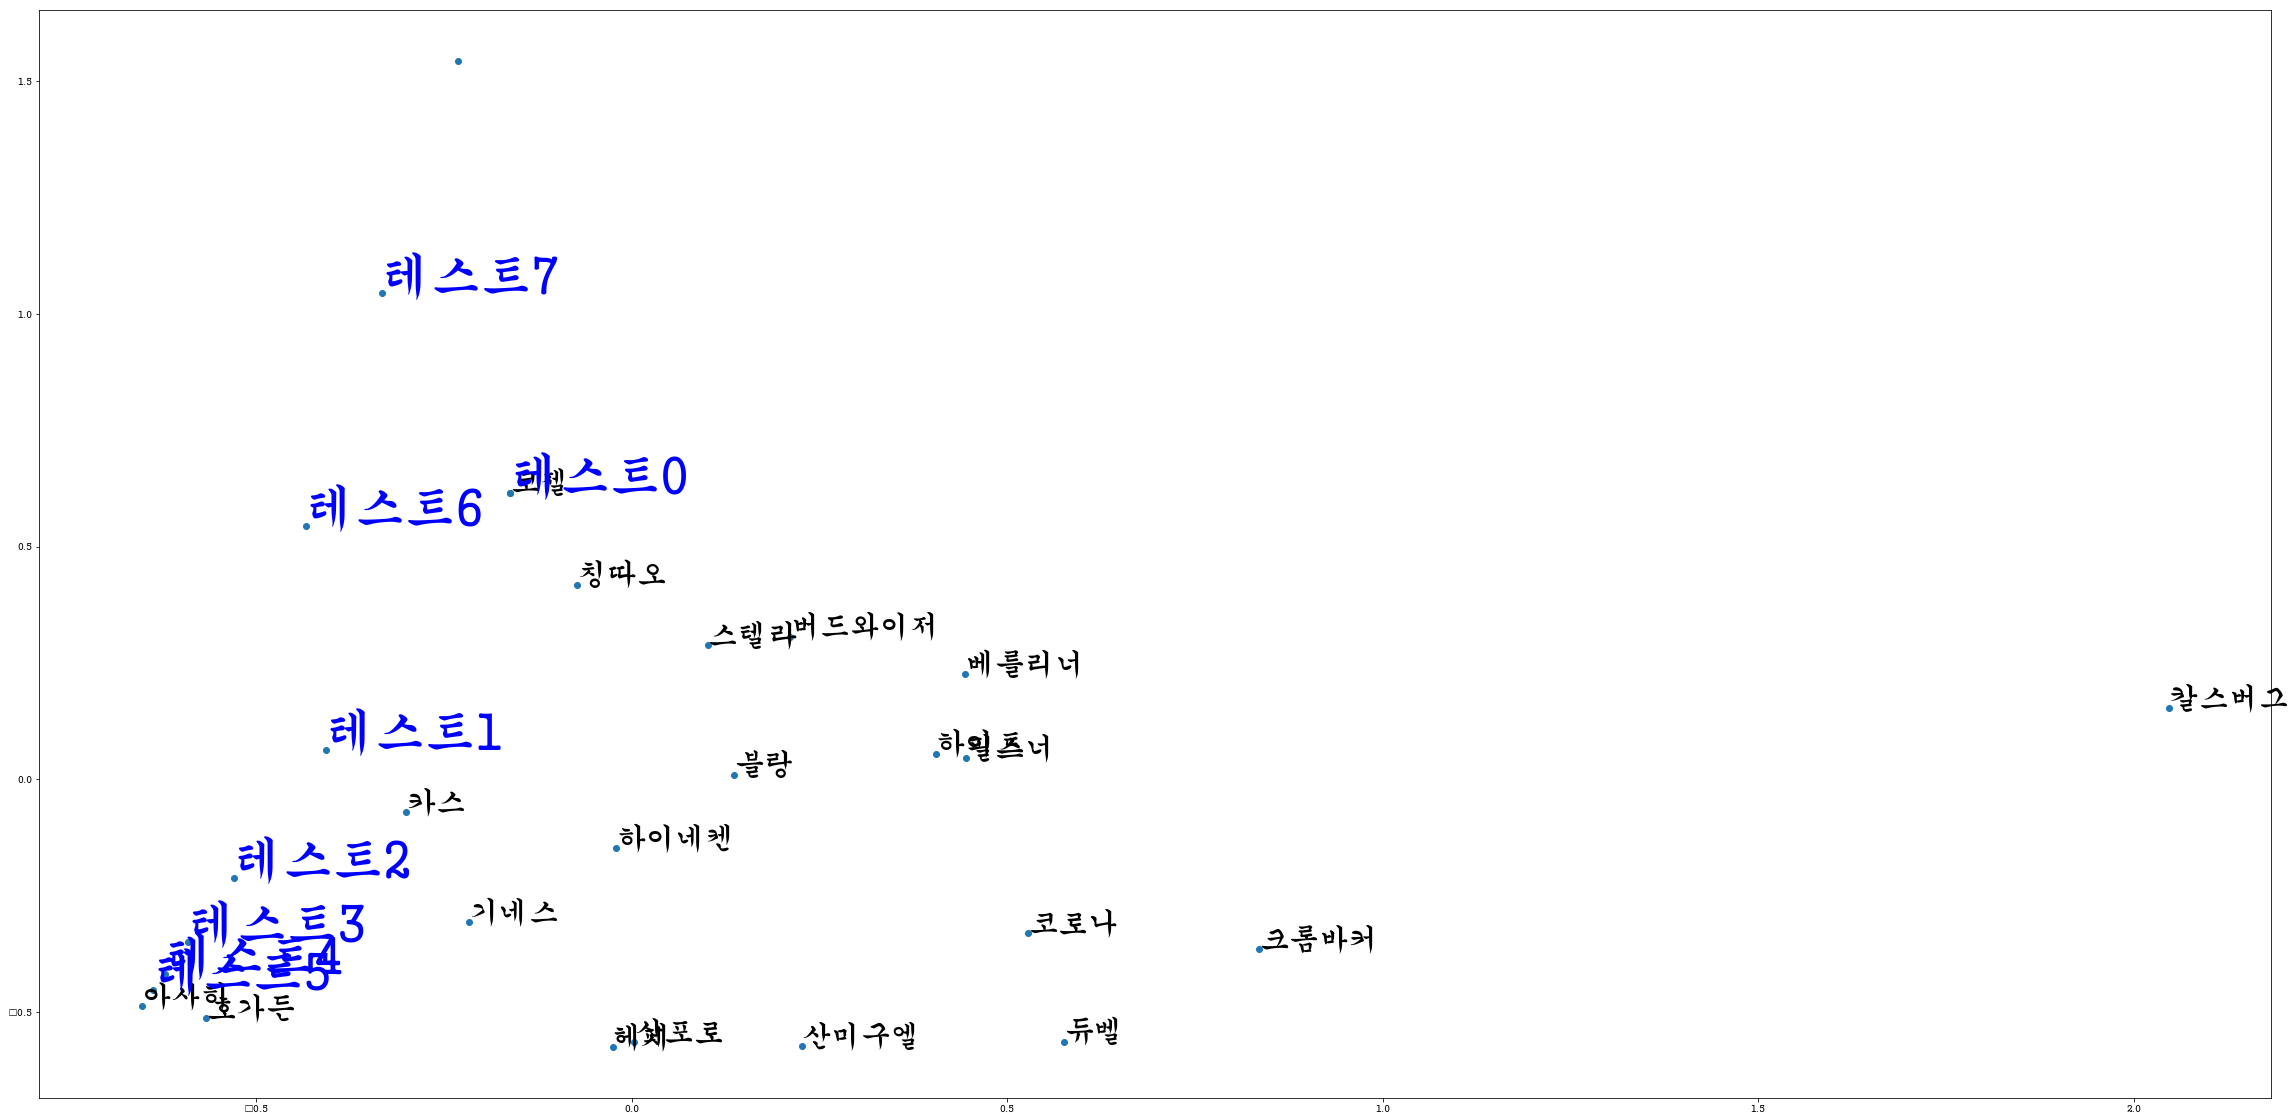

In [281]:
path = 'C:\Windows\\Fonts\\HYGSRB.TTF'
fontprop = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=fontprop)

fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(merged_tsne_DF['x'], merged_tsne_DF['y'])

for word, pos in merged_tsne_DF[0:20].iterrows():
    ax.annotate(word, pos, fontsize=30)
    
for word, pos in merged_tsne_DF[21:].iterrows():
    ax.annotate(word, pos, fontsize=50,color="blue")
    
#ax.annotate("1차설문",test11,fontsize=40,color="purple")
#ax.annotate("2차설문",test21,fontsize=40,color = "purple")
#ax.annotate("3차설문",test31,fontsize=40,color= "purple")
#ax.annotate("최종위치",test41,fontsize=40,color="red")
#ax.annotate("test51",test51,fontsize=40)
#ax.annotate("test61",test61,fontsize=40)

#ax.annotate("test12",test12,fontsize=40,color="red")
#ax.annotate("test22",test22,fontsize=40,color="red")
#ax.annotate("test32",test32,fontsize=40,color="red")
#ax.annotate("test42",test42,fontsize=40,color="red")
#ax.annotate("test52",test52,fontsize=40,color="red")
#ax.annotate("test62",test62,fontsize=40,color="red")

plt.show()

In [134]:
test11 = ((merged_tsne_DF.loc["칭따오",:] - merged_tsne_DF.loc["하이네켄",:])/2+ merged_tsne_DF.loc["하이네켄",:])
test21 = ((merged_tsne_DF.loc["하이트",:]-test11)/2+test11)
test31 = ((merged_tsne_DF.loc["듀벨",:]-test21)/2+test21)
test41 = ((merged_tsne_DF.loc["칼스버그",:]-test31)/2+test31)
test51 = ((merged_tsne_DF.loc["삿포로",:]-test41)/2+test41)
test61 = ((test51 - test41)/2+test41)